# 0. SETUP

Place all the image into a new folder call "all". The file will generate a CSV for analysing it

In [1]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

In [2]:
CSV_PATH = "workspace/annotations"
IMAGE_PATH = os.path.join("workspace", "images","all")

In [3]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df



In [4]:
def main():
    for folder in ['all']:
        image_path = os.path.join(os.getcwd(), (IMAGE_PATH))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv((CSV_PATH + "/"+ folder + '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')


In [5]:
main()

Successfully converted xml to csv.


# 1. Saving the Data

In [6]:
df = pd.read_csv(CSV_PATH + '/all_labels.csv')

In [7]:
list_of_image = {}

for index, row in df.iterrows():
    d = row.to_dict()
    list_of_image[d["filename"]] = d["class"]

print(list_of_image)

{'001.jpg': 'wet syringe', '002.jpg': 'wet syringe', '003.jpg': 'wet syringe', '004.jpg': 'wet syringe', '005.jpg': 'wet syringe', '006.jpg': 'wet syringe', '007.jpg': 'wet syringe', '008.jpg': 'wet syringe', '009.jpg': 'wet syringe', '010.jpg': 'wet syringe', '011.jpg': 'wet syringe', '012.jpg': 'wet syringe', '013.jpg': 'wet syringe', '014.jpg': 'wet syringe', '015.jpg': 'wet syringe', '016.jpg': 'wet syringe', '017.jpg': 'wet syringe', '018.jpg': 'wet syringe', '019.jpg': 'wet syringe', '020.jpg': 'wet syringe', '021.jpg': 'wet syringe', '022.jpg': 'wet syringe', '023.jpg': 'wet syringe', '024.jpg': 'wet syringe', '025.jpg': 'wet syringe', '026.jpg': 'wet syringe', '027.jpg': 'wet syringe', '028.jpg': 'wet syringe', '029.jpg': 'wet syringe', '030.jpg': 'wet syringe', '031.jpg': 'wet syringe', '032.jpg': 'wet syringe', '033.jpg': 'wet syringe', '034.jpg': 'wet syringe', '035.jpg': 'wet syringe', '036.jpg': 'wet syringe', '037.jpg': 'wet syringe', '038.jpg': 'wet syringe', '039.jpg': 

# 2. Analysing the Data

In [8]:
import matplotlib.pyplot as plt

label_class = {}

for index in list_of_image:
    category = list_of_image[index]
    if category not in label_class:
        label_class[category] = 1
    else:
        label_class[category] =  label_class[category] + 1

label_class

{'wet syringe': 214,
 'dirty plunger': 178,
 'dirty syringe': 229,
 'dry plunger': 192,
 'dry syringe': 271,
 'wet plunger': 112,
 'moist syringe': 53,
 'moist plunger': 14}

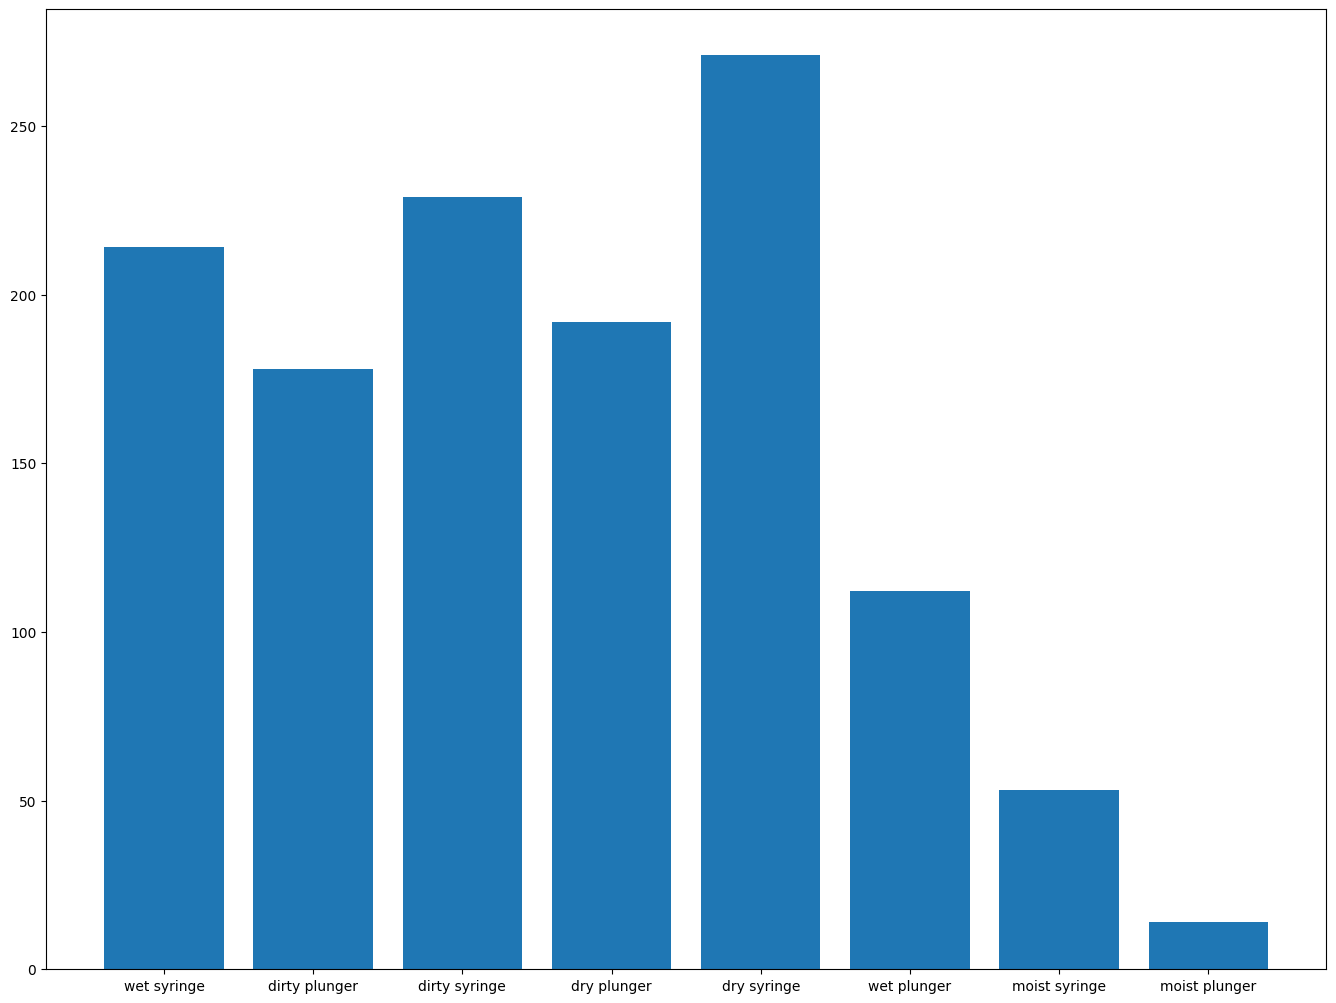

{'wet syringe': 214, 'dirty plunger': 178, 'dirty syringe': 229, 'dry plunger': 192, 'dry syringe': 271, 'wet plunger': 112, 'moist syringe': 53, 'moist plunger': 14}


In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

category = list(label_class.keys())
value = list(label_class.values())

ax.bar(category,value)
plt.show()

print(label_class)

# 3. Split the image

In [14]:
TRAIN_FOLDER =  os.path.join(os.getcwd(), "workspace", "images", "train")
TEST_FOLDER =  os.path.join(os.getcwd(), "workspace", "images", "test")

!mkdir {TRAIN_FOLDER}
!mkdir {TEST_FOLDER}

#Total image to train
TOTAL_COUNT = 120



A subdirectory or file C:\Users\huiji\OneDrive\Documents\GitHub\CSC3003_OIP_Object_Detection\workspace\images\train already exists.
A subdirectory or file C:\Users\huiji\OneDrive\Documents\GitHub\CSC3003_OIP_Object_Detection\workspace\images\test already exists.


In [15]:
import re

# Custom: for _category in  ["moist plunger", "moist syringe"]:

exception = ["moist plunger", "moist syringe"]
for _category in category:
    if _category not in exception:
        
        img_num = 0

        if label_class[_category] < TOTAL_COUNT:
            total_num = label_class[_category]
            training_num = int(label_class[_category] *0.8)

        else:
            total_num = TOTAL_COUNT
            training_num =  int(TOTAL_COUNT * 0.8)

        print(training_num)
        print(_category)

        for img_name in list_of_image:
            name = os.path.splitext(img_name)        

            img_file = os.path.join(os.getcwd(), IMAGE_PATH, img_name)
            xml_file = os.path.join(os.getcwd(), IMAGE_PATH, "{}.xml".format(name[0]))

            img_class = list_of_image[img_name]

            if img_class == _category:
                if img_num < training_num:
                    !copy "{img_file}" {TRAIN_FOLDER}
                    !copy "{xml_file}" {TRAIN_FOLDER}

                    img_num = img_num + 1

                elif img_num <= total_num:
                    !copy "{img_file}" {TEST_FOLDER}
                    !copy "{xml_file}" {TEST_FOLDER}

                    img_num = img_num + 1

            else:
                pass

        print("{} done with training image : {}, test image : {}".format(_category, training_num, int(total_num * 0.2)))


96
wet syringe
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copie

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 fi

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 fi

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
dry plunger done with training image : 96, test image : 24
96
dry syringe
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 fi